<a href="https://colab.research.google.com/github/archanaade/Demo/blob/master/Netflix_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS



In [ ]:
df=pd.read_csv('/content/netflix1.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
#check missing values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.shape


(8790, 10)

In [ ]:
#drop rows with missing values
df.dropna(inplace=True)
df.dtypes

,0
show_id,object
type,object
title,object
director,object
country,object
date_added,object
release_year,int64
rating,object
duration,object
listed_in,object


In [ ]:
#convert date added to date time
df['date_added']=pd.to_datetime(df['date_added'])


In [ ]:
#exploratory data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [ ]:
df.nunique()

,0
show_id,8790
type,2
title,8787
director,4528
country,86
date_added,1713
release_year,74
rating,14
duration,220
listed_in,513


if dataset contains all categorical data the EDA focuses on understanding single variable and relationship between them using frequencies  and visualiztion

In [ ]:
# EDA technique
# we use 1) calculate count and proportion of each categary in  single variable
#use value_count method
#count number of movies and tv shows
type_counts=df['type'].value_counts()
type_counts

,count
type,
Movie,6126
TV Show,2664


/tmp/ipython-input-2715375240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index,y=type_counts.values,palette='Set2')


<function matplotlib.pyplot.show(close=None, block=None)>

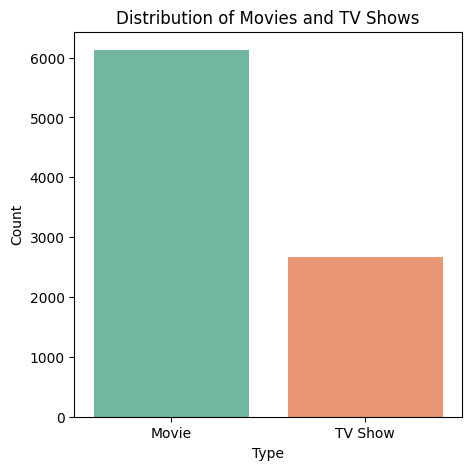

In [ ]:
#plot distribution
plt.figure(figsize=(5,5))
sns.barplot(x=type_counts.index,y=type_counts.values,palette='Set2')
plt.title('Distribution of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show

In [ ]:
#split listed_in column and count genrs(perticular count of each options of 'listed_ in' column)
df['genres'] = df['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(df['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)
print(genre_counts)


 International Movies     2624
Dramas                    1599
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     773
 Independent Movies        736
 TV Dramas                 695
 Romantic Movies           613
Name: count, dtype: int64


/tmp/ipython-input-235589617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=genre_counts.index,y=genre_counts.values,palette='Set3')
/tmp/ipython-input-235589617.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


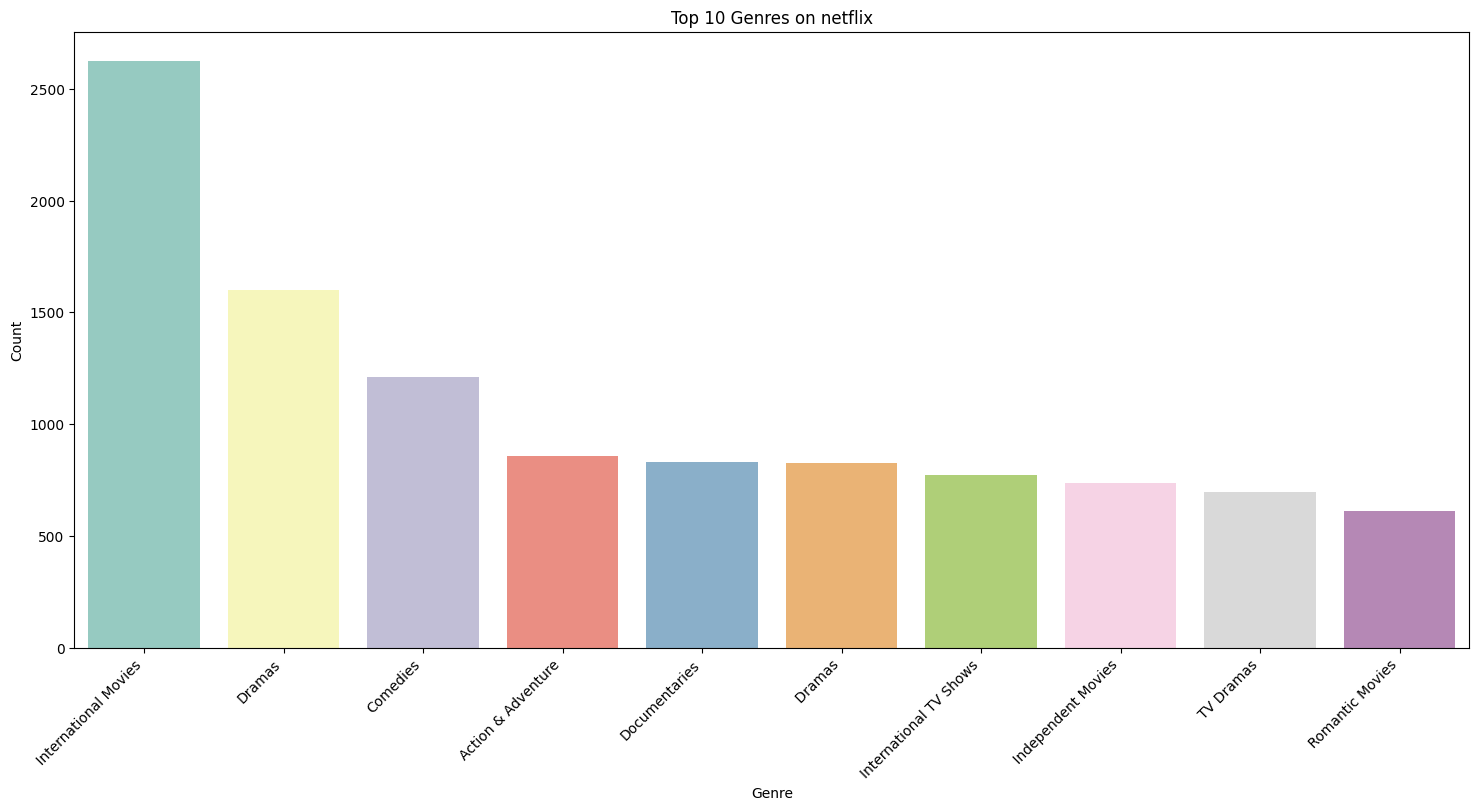

In [ ]:
#plot the graph for genre count of listed_in column
plt.figure(figsize=(18,8))
ax=sns.barplot(x=genre_counts.index,y=genre_counts.values,palette='Set3')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.rcParams["axes.labelsize"] = 18
plt.title('Top 10 Genres on netflix')

plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [ ]:
#extract year from date_added column
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day

/tmp/ipython-input-3413676293.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added',data=df,palette='coolwarm')


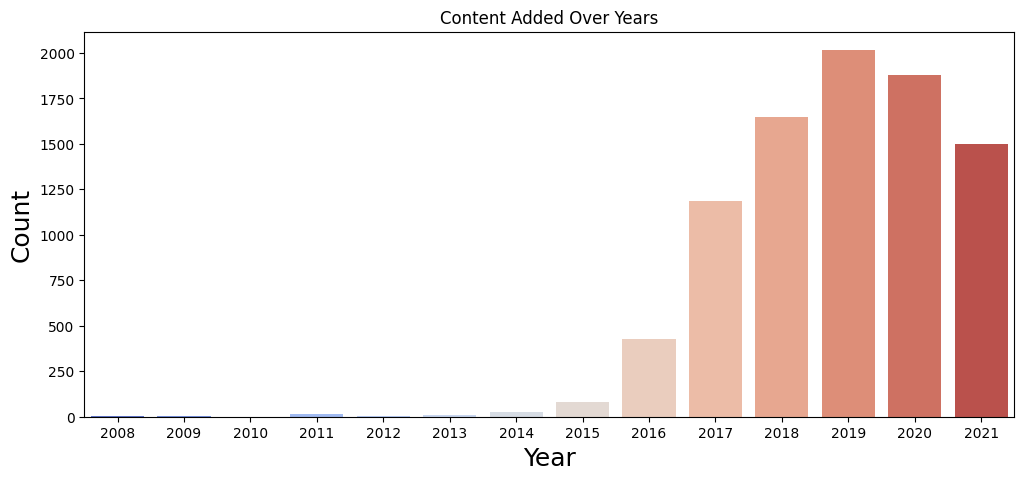

In [ ]:
#plot content over years
plt.figure(figsize=(12,5))
sns.countplot(x='year_added',data=df,palette='coolwarm')
plt.title('Content Added Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [ ]:
#top 10 directors with the most titles
director_counts = df['director'].value_counts().head(10)
print(director_counts)

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Martin Scorsese             12
Name: count, dtype: int64


/tmp/ipython-input-1459455094.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=director_counts.index,y=director_counts.values,palette='Set3')
/tmp/ipython-input-1459455094.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


Text(0, 0.5, 'Director')

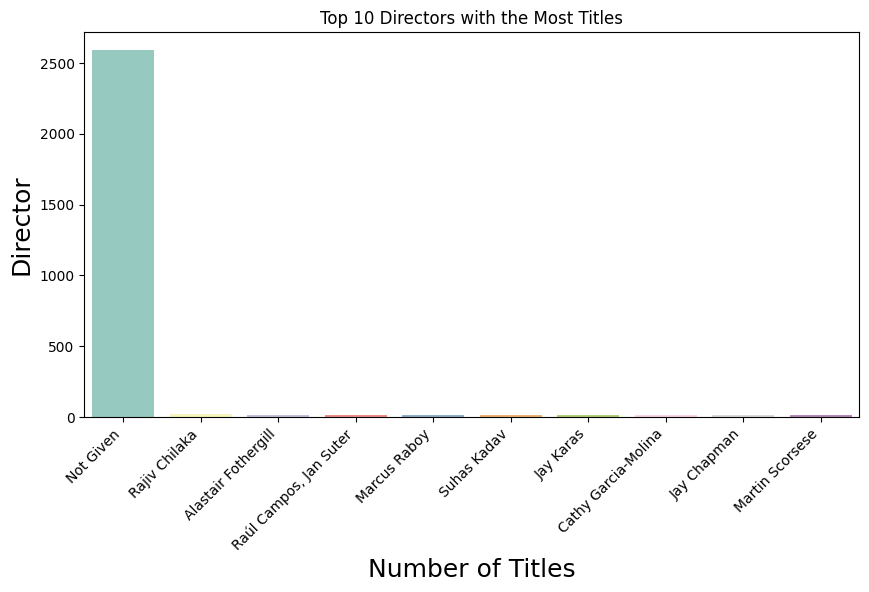

In [ ]:
#plot top diectors
plt.figure(figsize=(10,5))
ax=sns.barplot(x=director_counts.index,y=director_counts.values,palette='Set3')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.rcParams["axes.labelsize"] = 18
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')

In [ ]:
#generating word cloud for movie titles ,it means creating a visual summary of text where
#the size of each word shows how often it appears;
#bigger words are more frequent, helping to quickly identify key themes
movie_titles = df[df['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS).generate(' '.join(df[df['type'] == 'Movie']['title']))


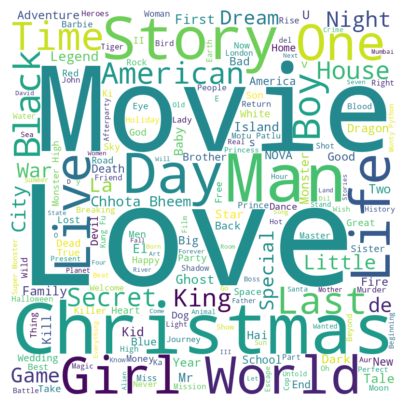

In [ ]:
#plot word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#content distribution on netfilx
df['type'].value_counts()

,count
type,
Movie,6126
TV Show,2664


Text(0.5, 0.98, 'Total Content on Netflix')

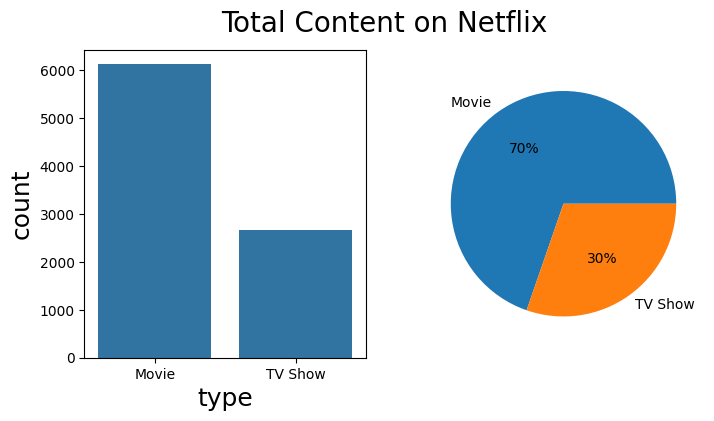

In [ ]:
#content distribution with the hepl of graph
freq=df['type'].value_counts()
fig, axes=plt.subplots(1,2, figsize=(8, 4))
sns.countplot(df, x=df['type'], ax=axes[0])
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)

In [ ]:
#visual represantation rating  of frequency of movies and tv shows
df['rating'].value_counts()

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


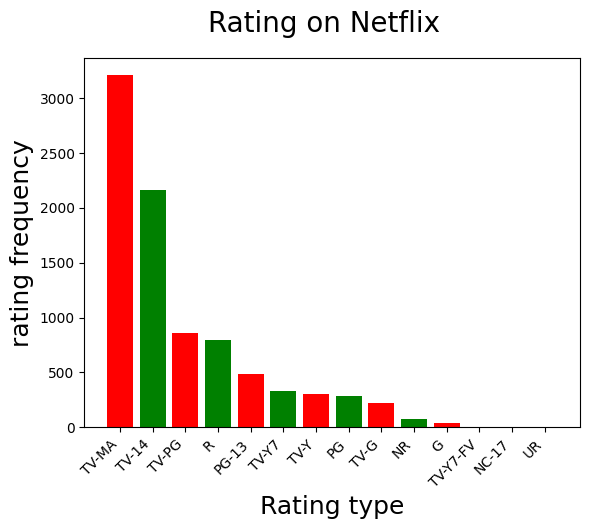

Text(0.5, 0.98, 'Rating on Netflix')

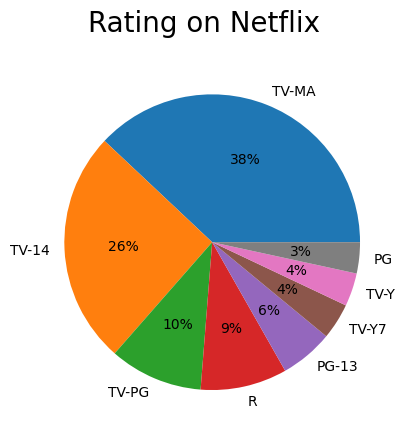

In [ ]:
ratings=df['rating'].value_counts().reset_index().sort_values(by='count',ascending=False)
plt.bar(ratings['rating'], ratings['count'],color=['red','green'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Rating type')
plt.ylabel('rating frequency')
plt.suptitle('Rating on Netflix',fontsize=20)
plt.show()
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8],
autopct='%.0f%%')
plt.suptitle('Rating on Netflix', fontsize=20)

In [ ]:
df.describe()

,date_added,release_year,year_added,month_added,day_added
count,8790,8790.000000,8790.000000,8790.000000,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163,2018.873606,6.655859,12.500000
min,2008-01-01 00:00:00,1925.000000,2008.000000,1.000000,1.000000
25%,2018-04-06 00:00:00,2013.000000,2018.000000,4.000000,1.000000
50%,2019-07-03 00:00:00,2017.000000,2019.000000,7.000000,13.000000
75%,2020-08-19 18:00:00,2019.000000,2020.000000,10.000000,20.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000,12.000000,31.000000
std,NaN,8.825466,1.573568,3.436103,9.887635


In [ ]:
df['country'].value_counts()
#

,count
country,
United States,3240
India,1057
United Kingdom,638
Pakistan,421
Not Given,287
...,...
Luxembourg,1
Senegal,1
Belarus,1


          country  count
0   United States   3240
1           India   1057
2  United Kingdom    638
3        Pakistan    421
4       Not Given    287
5          Canada    271
6           Japan    259
7     South Korea    214
8          France    213
9           Spain    182


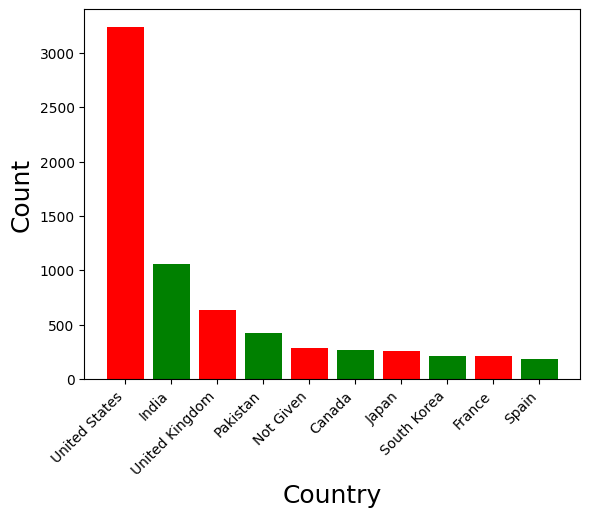

In [ ]:
#top 10 countries reviw on netflix
ten_countries = df['country'].value_counts().reset_index().sort_values(by='count', ascending=False).head(10)
plt.bar(ten_countries['country'], ten_countries['count'], color=['red', 'green'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Count')
print(ten_countries)

In [ ]:
#monthly release of tv shows and movies on Netflix
df['year']=df['date_added'].dt.year
df['month']=df['date_added'].dt.month
df['day']=df['date_added'].dt.day


In [ ]:
monthly_movie_release=df[df['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release=df[df['type']=='TV Show']['month'].value_counts().sort_index()


TypeError: range indices must be integers or slices, not tuple

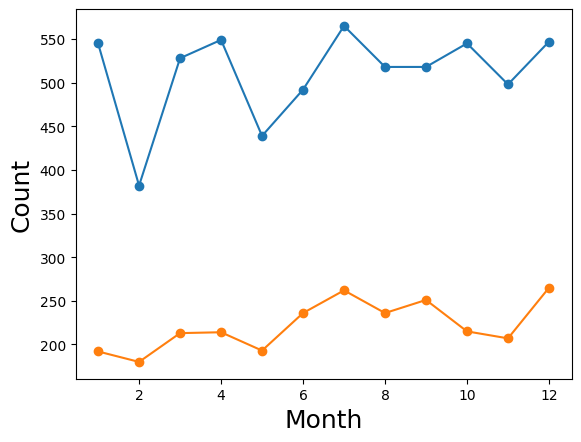

In [ ]:
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies', marker='o')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='TV Shows', marker='o')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13)['jan','feb','march','april','may','june','july','august','sep','oct','nov','dec'])
plt.legend()
plt.grid(True)
plt.title('Monthly Release of Movies and TV Shows on Netflix')

NameError: name 'x' is not defined

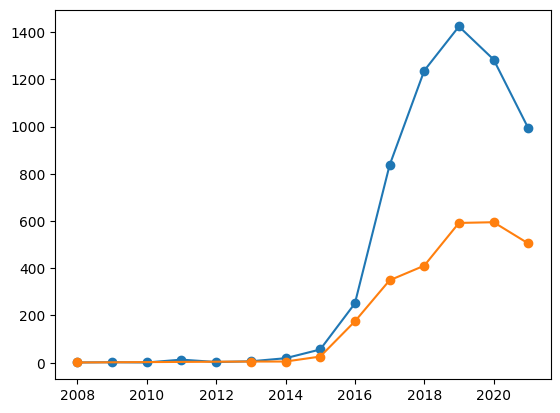

In [ ]:
#yearly release of movies and series on netflix
yearly_movie_release=df[df['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_release=df[df['type']=='TV Show']['year'].value_counts().sort_index()
plt.plot(yearly_movie_release.index, yearly_movie_release.values, label='Movies', marker='o')
plt.plot(yearly_series_release.index, yearly_series_release.values, label='TV Shows', marker='o')
x.set_xlabel('Year')
plt.ylabel('Count')
plt.xticks(range(2008, 2024))
plt.legend()
plt.grid(True)
plt.title('Yearly Release of Movies and TV Shows on Netflix')

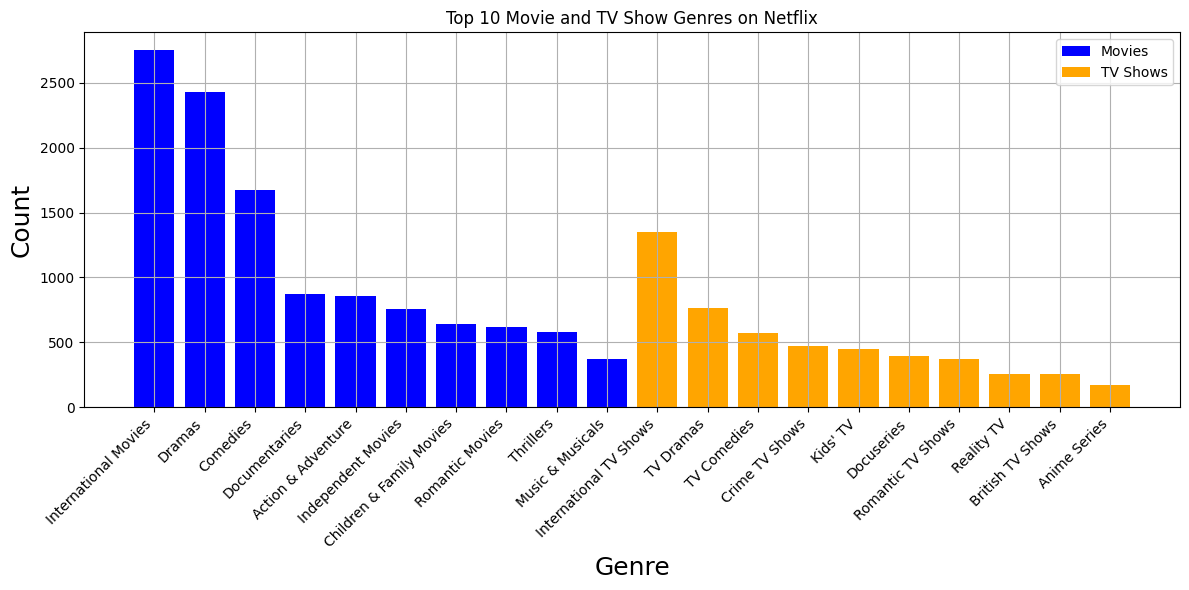

In [ ]:
from itertools import groupby
#top 10 movie genres
movie_genres_split = df[df['type'] == 'Movie']['listed_in'].apply(lambda x: x.split(',')).explode()
popular_movie_genre = movie_genres_split.str.strip().value_counts().head(10)

series_genres_split = df[df['type'] == 'TV Show']['listed_in'].apply(lambda x: x.split(',')).explode()
popular_series_genre = series_genres_split.str.strip().value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(popular_movie_genre.index, popular_movie_genre.values, label='Movies', color='blue')
plt.bar(popular_series_genre.index, popular_series_genre.values, label='TV Shows', color='orange')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.title('Top 10 Movie and TV Show Genres on Netflix')
plt.tight_layout()
plt.show()

                        director  count
1                  Rajiv Chilaka     20
2            Alastair Fothergill     18
3         Raúl Campos, Jan Suter     18
4                   Marcus Raboy     16
5                    Suhas Kadav     16
6                      Jay Karas     14
7            Cathy Garcia-Molina     13
8                    Jay Chapman     12
9                Martin Scorsese     12
10               Youssef Chahine     12
11              Steven Spielberg     11
12  Mark Thornton, Todd Kauffman     10
13              Don Michael Paul     10
14                  David Dhawan      9


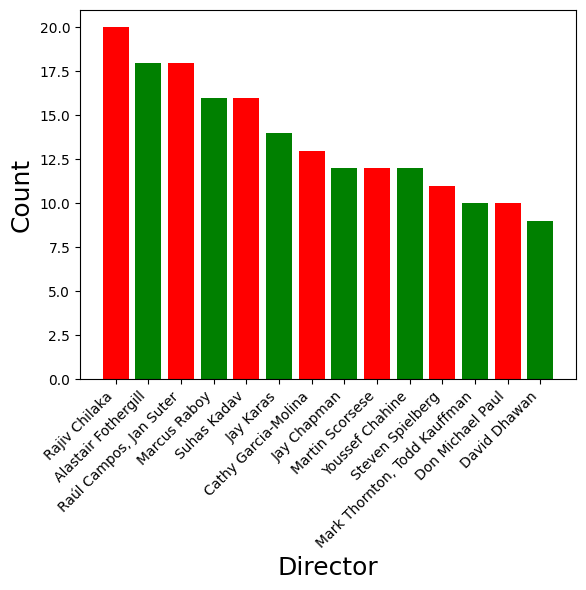

In [ ]:
#top 15 directors across Netflix with high frequency of movies and shows
directors=df['director'].value_counts().head(15).reset_index().sort_values(by='count',ascending=False)[1:15]
plt.bar(directors['director'],directors['count'],color=['red','green'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Director')
plt.ylabel('Count')
print(directors)

conclusion
In this project, we:
1. Cleaned the data by handling missing values, removing duplicates, and
converting data types.
2. Explored the data through various visualizations such as bar plots and word
clouds.
3. Analyzed content trends over time, identified popular genres, and highlighted
top directors.
Step 6: Next Steps
1. Feature Engineering: Create new features, such as counting the number of
genres per movie or extracting the duration in minutes.
2. Machine Learning: Use the cleaned and processed data to build models for
recommendations or trend predictions.
3. Advanced Visualization: Use interactive plots or dashboards for more detailed
analysis.
This project is a foundational exercise that introduces essential data analysis
techniques, paving the way for more advanced projects.